In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set()

# Extract the data

In [97]:
fifa = pd.read_csv('FIFA19 - FIFA19.csv')

## Data Cleaning

In [98]:
fifa.head()
columns = ['Jersey Number', 'Name', 'Age','Nationality','Overall','Potential', 'Jumping', 'Wage', 'SprintSpeed', 'Release Clause', 'Position', 'Weight']
fifa_modified = fifa.copy()[columns]
fifa_modified.head()

,Jersey Number,Name,Age,Nationality,Overall,Potential,Jumping,Wage,SprintSpeed,Release Clause,Position,Weight
0,10.0,L. Messi,31,Argentina,94,94,68.0,€565K,86.0,€226.5M,RF,159lbs
1,7.0,Cristiano Ronaldo,33,Portugal,94,94,95.0,€405K,91.0,€127.1M,ST,183lbs
2,10.0,Neymar Jr,26,Brazil,92,93,61.0,€290K,90.0,€228.1M,LW,150lbs
3,1.0,De Gea,27,Spain,91,93,67.0,€260K,58.0,€138.6M,GK,168lbs
4,7.0,K. De Bruyne,27,Belgium,91,92,63.0,€355K,76.0,€196.4M,RCM,154lbs


In [99]:
fifa_modified.tail()

,Jersey Number,Name,Age,Nationality,Overall,Potential,Jumping,Wage,SprintSpeed,Release Clause,Position,Weight
18202,22.0,J. Lundstram,19,England,47,65,55.0,€1K,57.0,€143K,CM,134lbs
18203,21.0,N. Christoffersson,19,Sweden,47,63,47.0,€1K,39.0,€113K,ST,170lbs
18204,33.0,B. Worman,16,England,47,67,60.0,€1K,69.0,€165K,ST,148lbs
18205,34.0,D. Walker-Rice,17,England,47,66,42.0,€1K,60.0,€143K,RW,154lbs
18206,33.0,G. Nugent,16,England,46,66,62.0,€1K,55.0,€165K,CM,176lbs


In [100]:
fifa_modified.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Jersey Number   18147 non-null  float64
 1   Name            18207 non-null  object 
 2   Age             18207 non-null  int64  
 3   Nationality     18207 non-null  object 
 4   Overall         18207 non-null  int64  
 5   Potential       18207 non-null  int64  
 6   Jumping         18159 non-null  float64
 7   Wage            18207 non-null  object 
 8   SprintSpeed     18159 non-null  float64
 9   Release Clause  16643 non-null  object 
 10  Position        18147 non-null  object 
 11  Weight          18159 non-null  object 
dtypes: float64(3), int64(3), object(6)
memory usage: 1.7+ MB


In [101]:
fifa_modified = fifa_modified.dropna()
fifa_modified.isna().sum()

Jersey Number     0
Name              0
Age               0
Nationality       0
Overall           0
Potential         0
Jumping           0
Wage              0
SprintSpeed       0
Release Clause    0
Position          0
Weight            0
dtype: int64

In [102]:
fifa_modified.describe()

,Jersey Number,Age,Overall,Potential,Jumping,SprintSpeed
count,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000
mean,19.657213,25.226221,66.162771,71.140900,65.120591,64.548819
std,16.054811,4.716588,7.008236,6.151409,11.856488,14.758874
min,1.000000,16.000000,46.000000,48.000000,15.000000,12.000000
25%,8.000000,21.000000,62.000000,67.000000,58.000000,57.000000
50%,17.000000,25.000000,66.000000,71.000000,66.000000,67.000000
75%,26.000000,29.000000,71.000000,75.000000,73.000000,75.000000
max,99.000000,45.000000,94.000000,95.000000,95.000000,96.000000


- We should modifiy Wage to column to be int instead of object

In [78]:
fifa_modified['Wage'] =pd.to_numeric(fifa_modified['Wage'].apply(lambda x: x[1:-1] if x != "€0" else '0'))

- Check

In [24]:
fifa_modified['Wage'].dtype

dtype('int64')

In [25]:
fifa_modified['Release Clause'] = pd.to_numeric(fifa_modified['Release Clause'].apply(lambda x: (x[1:])[:-1]))

<ipython-input-25-ca35f6d99d5f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fifa_modified['Release Clause'] = pd.to_numeric(fifa_modified['Release Clause'].apply(lambda x: (x[1:])[:-1]))


In [10]:
fifa_modified['Release Clause'].head()

0    226.5
1    127.1
2    228.1
3    138.6
4    196.4
Name: Release Clause, dtype: float64

## Univariate Analysis

- How are the wages distrubited? 

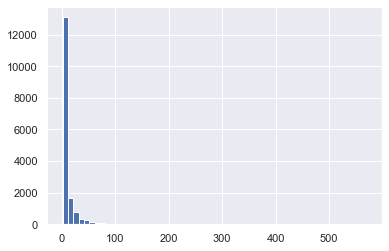

In [172]:
bins = np.arange(fifa_modified['Wage'].min(), fifa_modified['Wage'].max()+10, 10)
plt.hist(fifa_modified['Wage'], bins = bins);

- It seems that there are many outliers in the dat

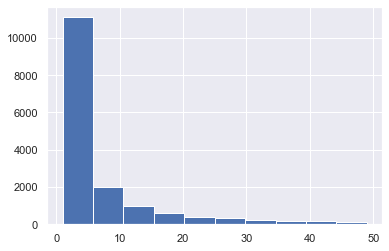

In [173]:
sliced_wages = fifa_modified[fifa_modified['Wage'] < 50].Wage
plt.hist(sliced_wages);

- How old are the players ?

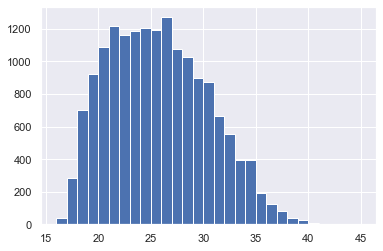

In [174]:
bins = np.arange(fifa_modified['Age'].min(), fifa_modified['Age'].max()+1, 1)
plt.hist(fifa_modified['Age'], bins = bins);

- 20-30, >40

- What are common nationalities?

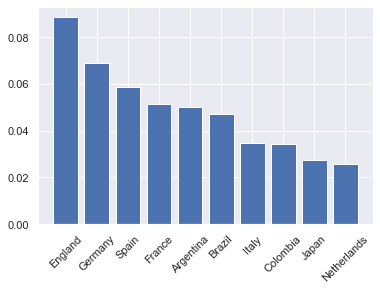

In [175]:
sliced_nat = fifa_modified.Nationality.value_counts(normalize=True)[:10]
plt.bar(x=sliced_nat.index, height=sliced_nat);
plt.xticks(rotation=45);

- Engalnd,... -> Messi argentina

## Bivariate analysis

- How is age correlated with wage?

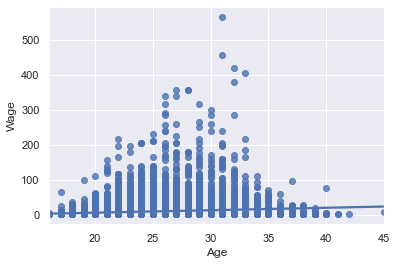

In [176]:
sns.regplot(data=fifa_modified, x='Age', y='Wage');

- It seems that the highest wages range from 35>Age>25

- Is age neg. correlated with sprintspeed?

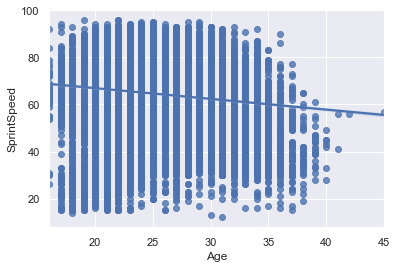

In [177]:
sns.regplot(data=fifa_modified, x='Age', y='SprintSpeed');

# Is weight correlated with speed ?

In [13]:
fifa_modified['Weight'].head()

0    159lbs
1    183lbs
2    150lbs
3    168lbs
4    154lbs
Name: Weight, dtype: object

- It seems that weight need cleaning

In [16]:
fifa_modified['Weight'] = pd.to_numeric(fifa_modified['Weight'].apply(lambda row:row[:-3]))

- check

In [17]:
fifa_modified['Weight'].dtype

dtype('int64')

Text(0, 0.5, 'SprintSpeed')

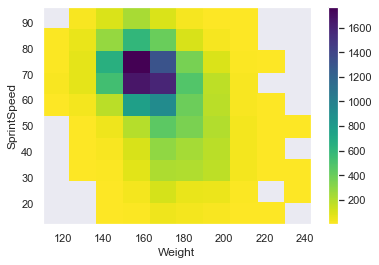

In [44]:
#fig, ax = plt.subplots(2)
#sns.regplot(data=fifa_modified, x='Weight', y='SprintSpeed',fit_reg=False)

plt.hist2d(data=fifa_modified, x='Weight', y='SprintSpeed', cmin=0.5, cmap = 'viridis_r');
plt.colorbar()
plt.xlabel('Weight')
plt.ylabel('SprintSpeed')

<AxesSubplot:xlabel='Weight'>

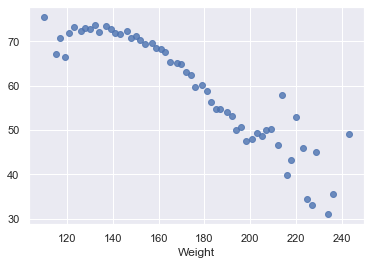

In [30]:
fifa_series = fifa_modified.groupby('Weight').mean()['SprintSpeed']
sns.regplot(y=fifa_series.values, x=fifa_series.index,fit_reg=False)


- Weight is negetivly correlated with sprintspeed

# How is position correlated with wage?

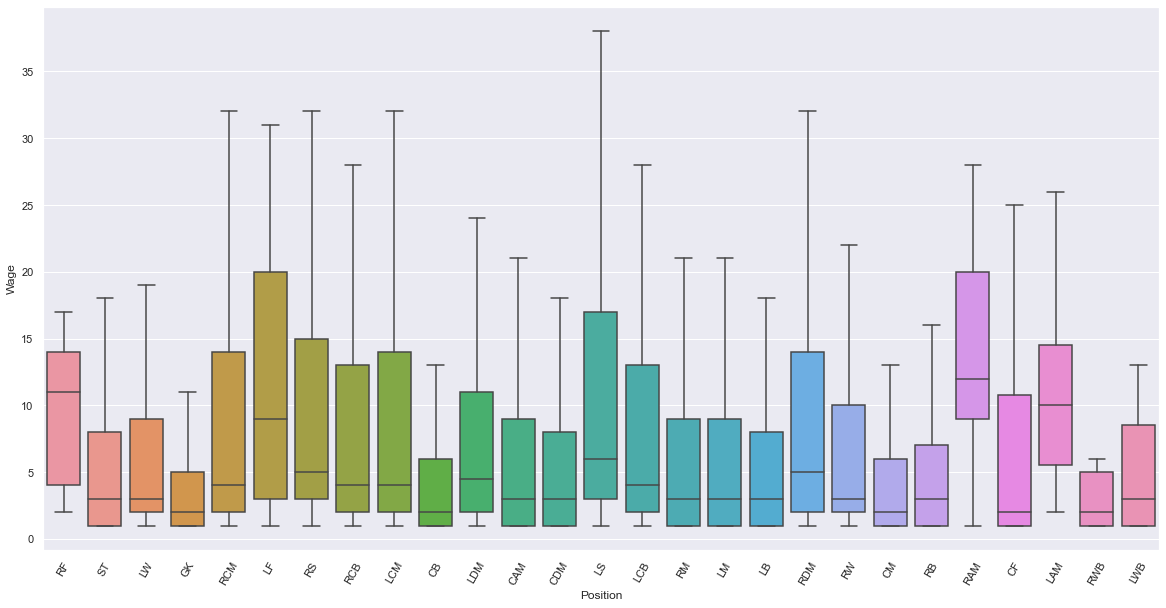

In [54]:
plt.figure(figsize=(20,10))
fifa_modified['Position'].value_counts()
sns.boxplot(data=fifa_modified, x='Position', y='Wage', showfliers = False)
plt.xticks(rotation=60);

- ....... LF,LS high range ,...

# Is the faster the player the agile the player

<AxesSubplot:xlabel='SprintSpeed'>

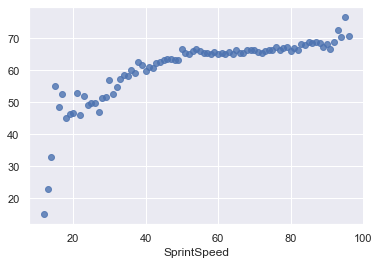

In [57]:
fifa_series = fifa_modified.groupby('SprintSpeed').mean()['Jumping']

sns.regplot(y=fifa_series.values, x=fifa_series.index,fit_reg=False)

- Weight is positivly correlated with sprintspeed

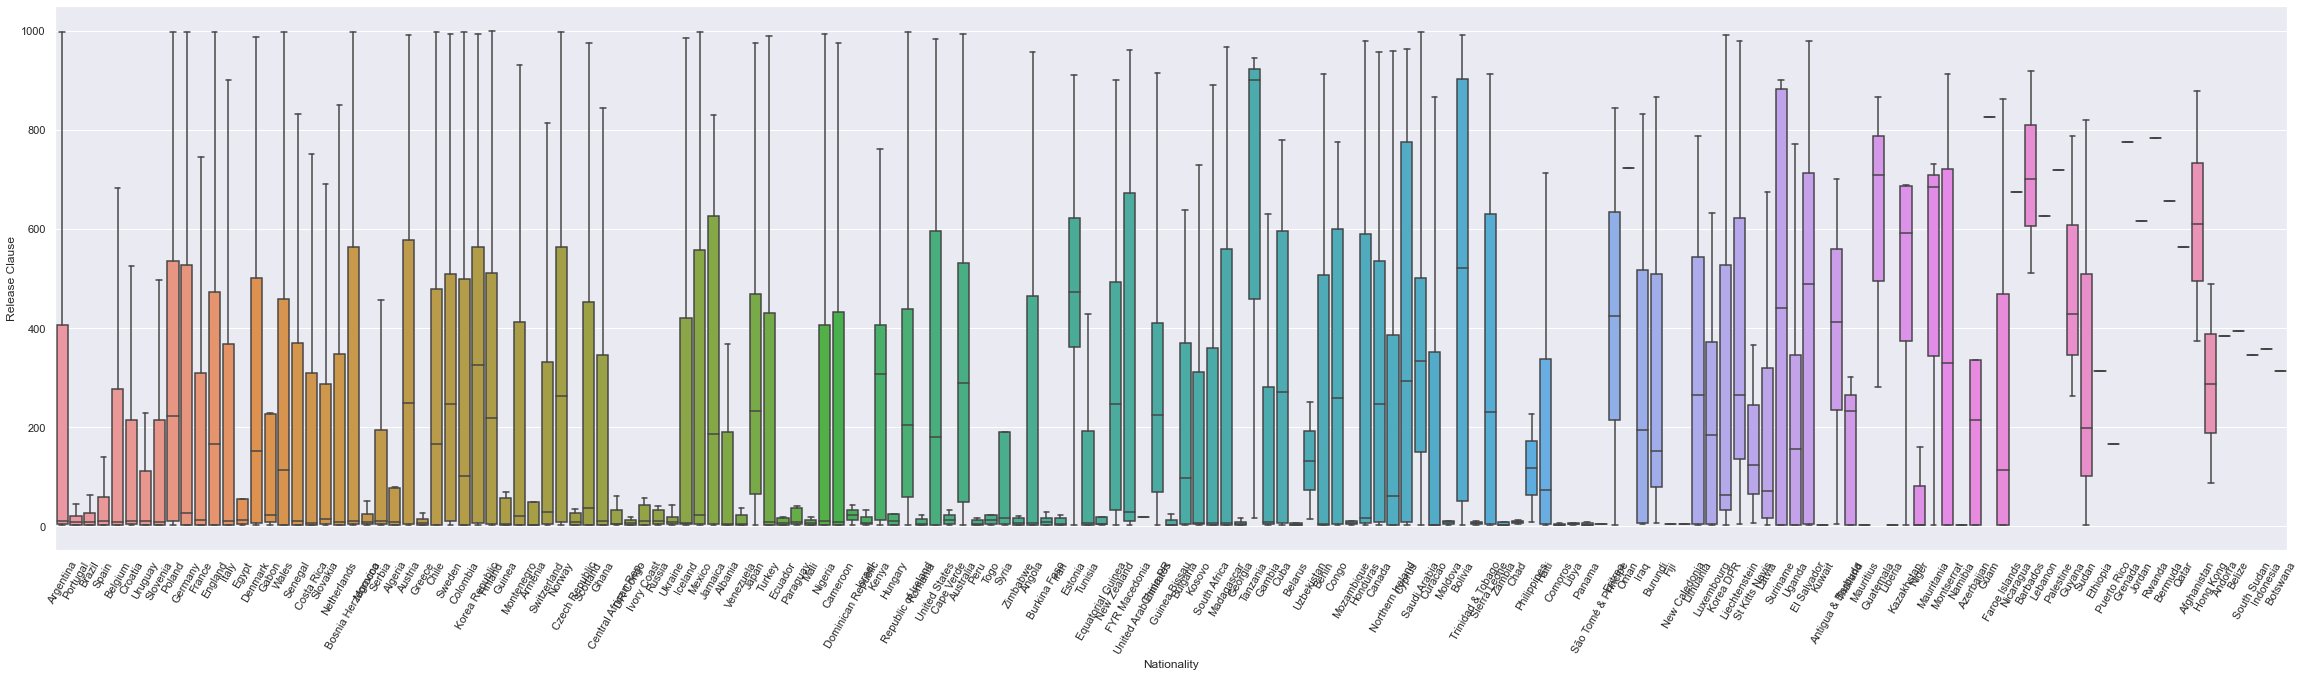

In [59]:
plt.figure(figsize=(40,10))
sns.boxplot(data=fifa_modified, x='Nationality', y='Release Clause', showfliers = False)
plt.xticks(rotation=60);

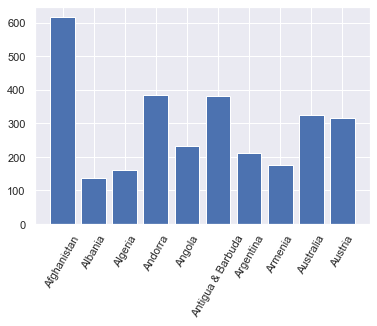

In [93]:
nationality_release = fifa_modified.groupby('Nationality').mean()['Release Clause'][:10]

plt.bar(x=nationality_release.index, height=nationality_release)
plt.xticks(rotation=60);

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Argentina'),
  Text(1, 0, 'Algeria'),
  Text(2, 0, 'Austria'),
  Text(3, 0, 'Armenia'),
  Text(4, 0, 'Albania'),
  Text(5, 0, 'Australia'),
  Text(6, 0, 'Angola'),
  Text(7, 0, 'Antigua & Barbuda'),
  Text(8, 0, 'Afghanistan'),
  Text(9, 0, 'Andorra')])

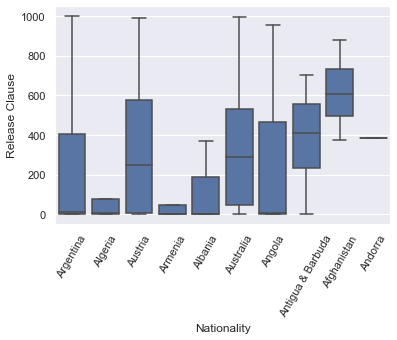

In [99]:
top_10 = fifa_modified.groupby('Nationality').mean()['Release Clause'][:10]
mask = top_10.index
top_10_df = fifa_modified[fifa_modified['Nationality'].isin(mask)]
sns.boxplot(data=top_10_df, x='Nationality', y='Release Clause', showfliers = False, color=sns.color_palette()[0])
plt.xticks(rotation=60)

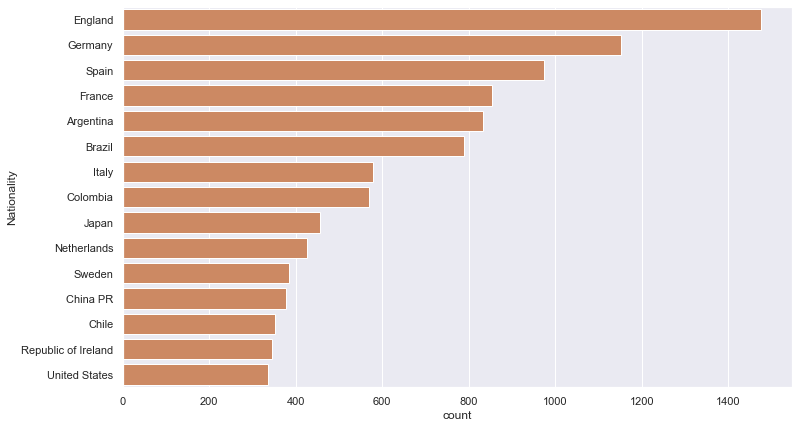

In [89]:
base_color = sns.color_palette()[1]
plt.figure(figsize=(12,7))

sns.countplot(y = fifa_modified['Nationality'], order=fifa_modified['Nationality'].value_counts().index[:15],color=base_color)

plt.show()
